In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_excel('heart_disease.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


## Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
# Imputing null values
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

C:\Users\marut\AppData\Local\Temp\ipykernel_8168\414602551.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Axes: >

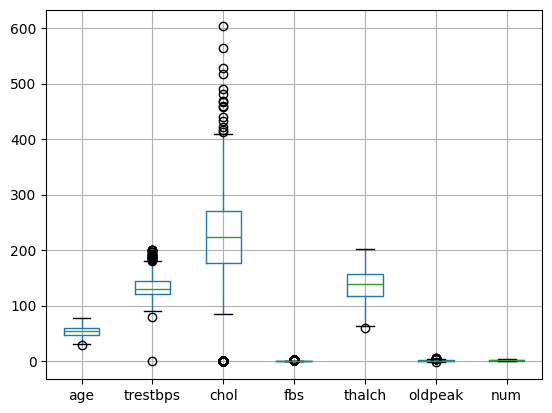

In [6]:
df.boxplot()

<Axes: xlabel='num', ylabel='count'>

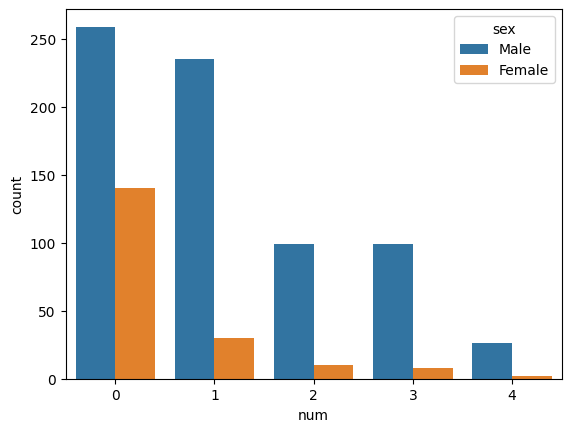

In [7]:
sns.countplot(x=df['num'],hue='sex',data=df)

(array([  7.,  46.,  94., 111., 118., 201., 176., 101.,  39.,  15.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

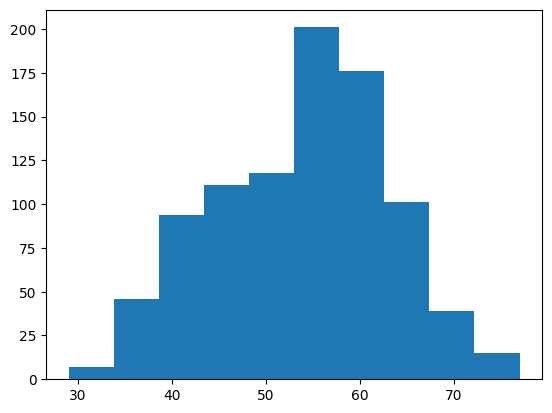

In [8]:
plt.hist(x=df['age'])

<Axes: xlabel='chol', ylabel='Count'>

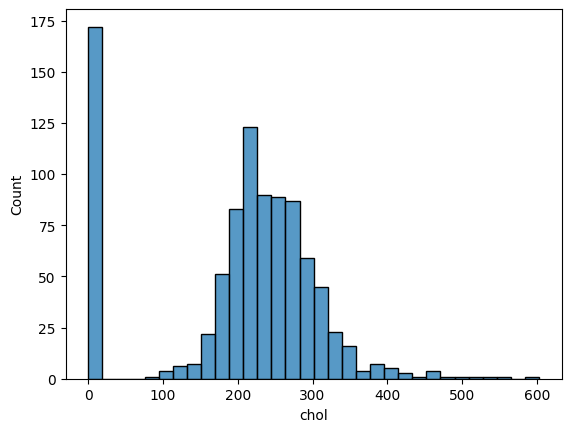

In [9]:
sns.histplot(x=df['chol'],data=df)

<Axes: xlabel='cp'>

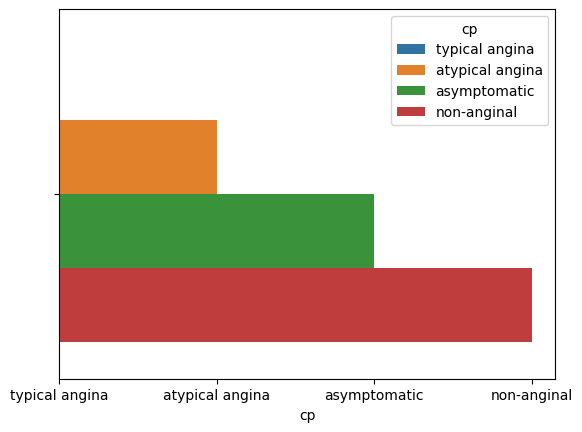

In [10]:
sns.barplot(x=df['cp'],data=df,hue='cp')

In [11]:
df.select_dtypes(include='object')

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,normal,False,flat,fixed defect
2,Male,asymptomatic,normal,False,flat,fixed defect
3,Male,typical angina,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,normal,True,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,False,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,True,flat,normal
905,Male,non-anginal,lv hypertrophy,True,downsloping,fixed defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,reversable defect


In [12]:
# Removing outliers using iosolation forest
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1,random_state=42)
num_col=df.select_dtypes(include='int')
df['Outliers']=iso.fit_predict(num_col)
cleaned_df=df.loc[df['Outliers']==1]
cleaned_df.reset_index(drop=True,inplace=True)

In [13]:
cleaned_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,Outliers
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0,1
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0,1
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0,1
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0,1
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,65,Male,asymptomatic,126,312,False,lv hypertrophy,156,FALSE,0.891253,downsloping,normal,3,1
813,51,Male,non-anginal,151,339,False,normal,122,FALSE,0.891253,upsloping,reversable defect,3,1
814,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,0.891253,flat,normal,3,1
815,64,Male,asymptomatic,145,212,False,lv hypertrophy,132,False,2.000000,flat,fixed defect,4,1


Encoding variables

In [14]:
from sklearn.preprocessing import LabelEncoder

cat_col=cleaned_df.select_dtypes(include='object').columns
for column in cat_col:
    cleaned_df[column]=cleaned_df[column].astype(str)
    encoder=LabelEncoder()
    cleaned_df[column]=encoder.fit_transform(cleaned_df[column])

C:\Users\marut\AppData\Local\Temp\ipykernel_8168\1110287590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column]=cleaned_df[column].astype(str)
C:\Users\marut\AppData\Local\Temp\ipykernel_8168\1110287590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column]=encoder.fit_transform(cleaned_df[column])
C:\Users\marut\AppData\Local\Temp\ipykernel_8168\1110287590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

## Splitting data

In [15]:
from sklearn.model_selection import train_test_split
x=cleaned_df.drop(columns=['num','Outliers'])
y=cleaned_df['num']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## Gini model

In [16]:
gini_model=DecisionTreeClassifier(criterion='gini',max_depth=5)
gini_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

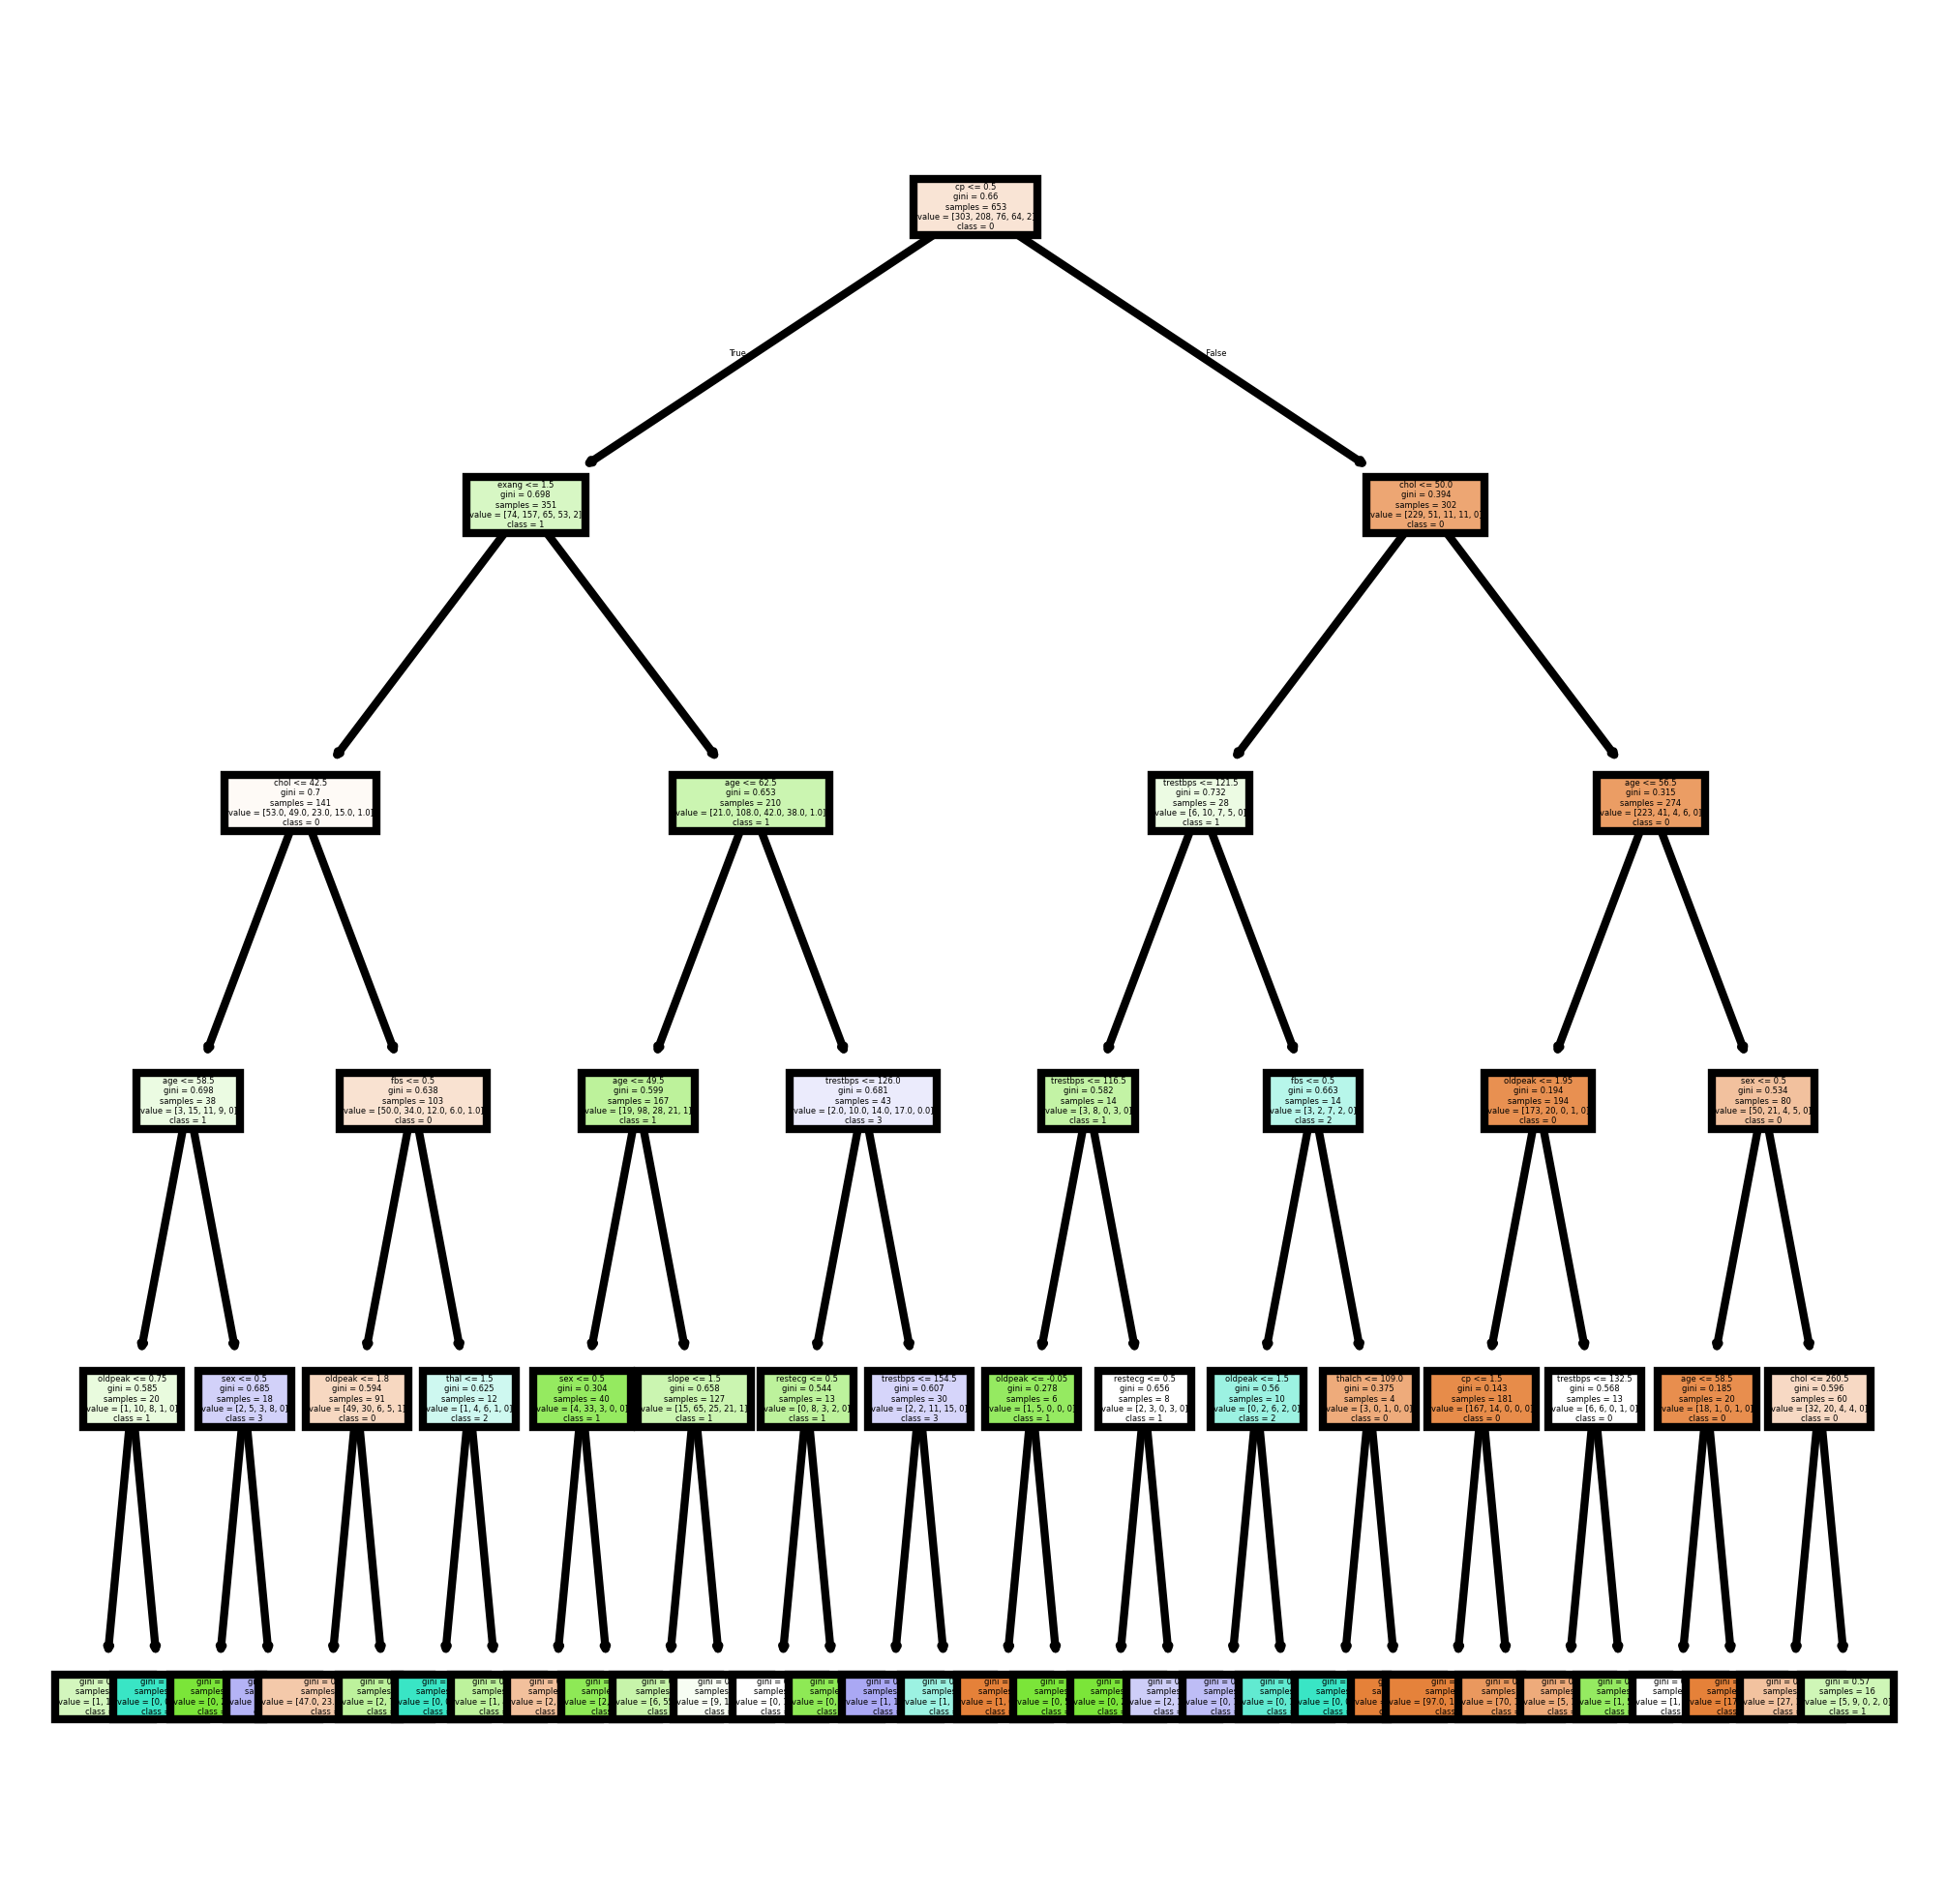

In [21]:
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal']
cn=['0','1','2','3','4']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=600)
tree.plot_tree(gini_model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [18]:
pd.Series(gini_model.feature_importances_,index=fn).sort_values(ascending=False)

cp          0.404568
age         0.129524
chol        0.123679
trestbps    0.073711
oldpeak     0.070547
exang       0.054917
sex         0.040191
fbs         0.037522
restecg     0.021789
thal        0.018876
slope       0.015867
thalch      0.008809
dtype: float64

In [19]:
g_preds=gini_model.predict(x_test)
pd.Series(g_preds).value_counts()

0    88
1    61
3    11
2     4
Name: count, dtype: int64

In [27]:
pd.crosstab(y_test,g_preds)

col_0,0,1,2,3
num,,,,
0,61,14,0,1
1,16,24,0,7
2,8,11,2,3
3,3,12,2,0


In [20]:
print('Training Accuracy',gini_model.score(x_train,y_train))
print('Testing Accuracy',gini_model.score(x_test,y_test))

Training Accuracy 0.7105666156202144
Testing Accuracy 0.5304878048780488


## Entrphy model

In [22]:
ent_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
ent_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

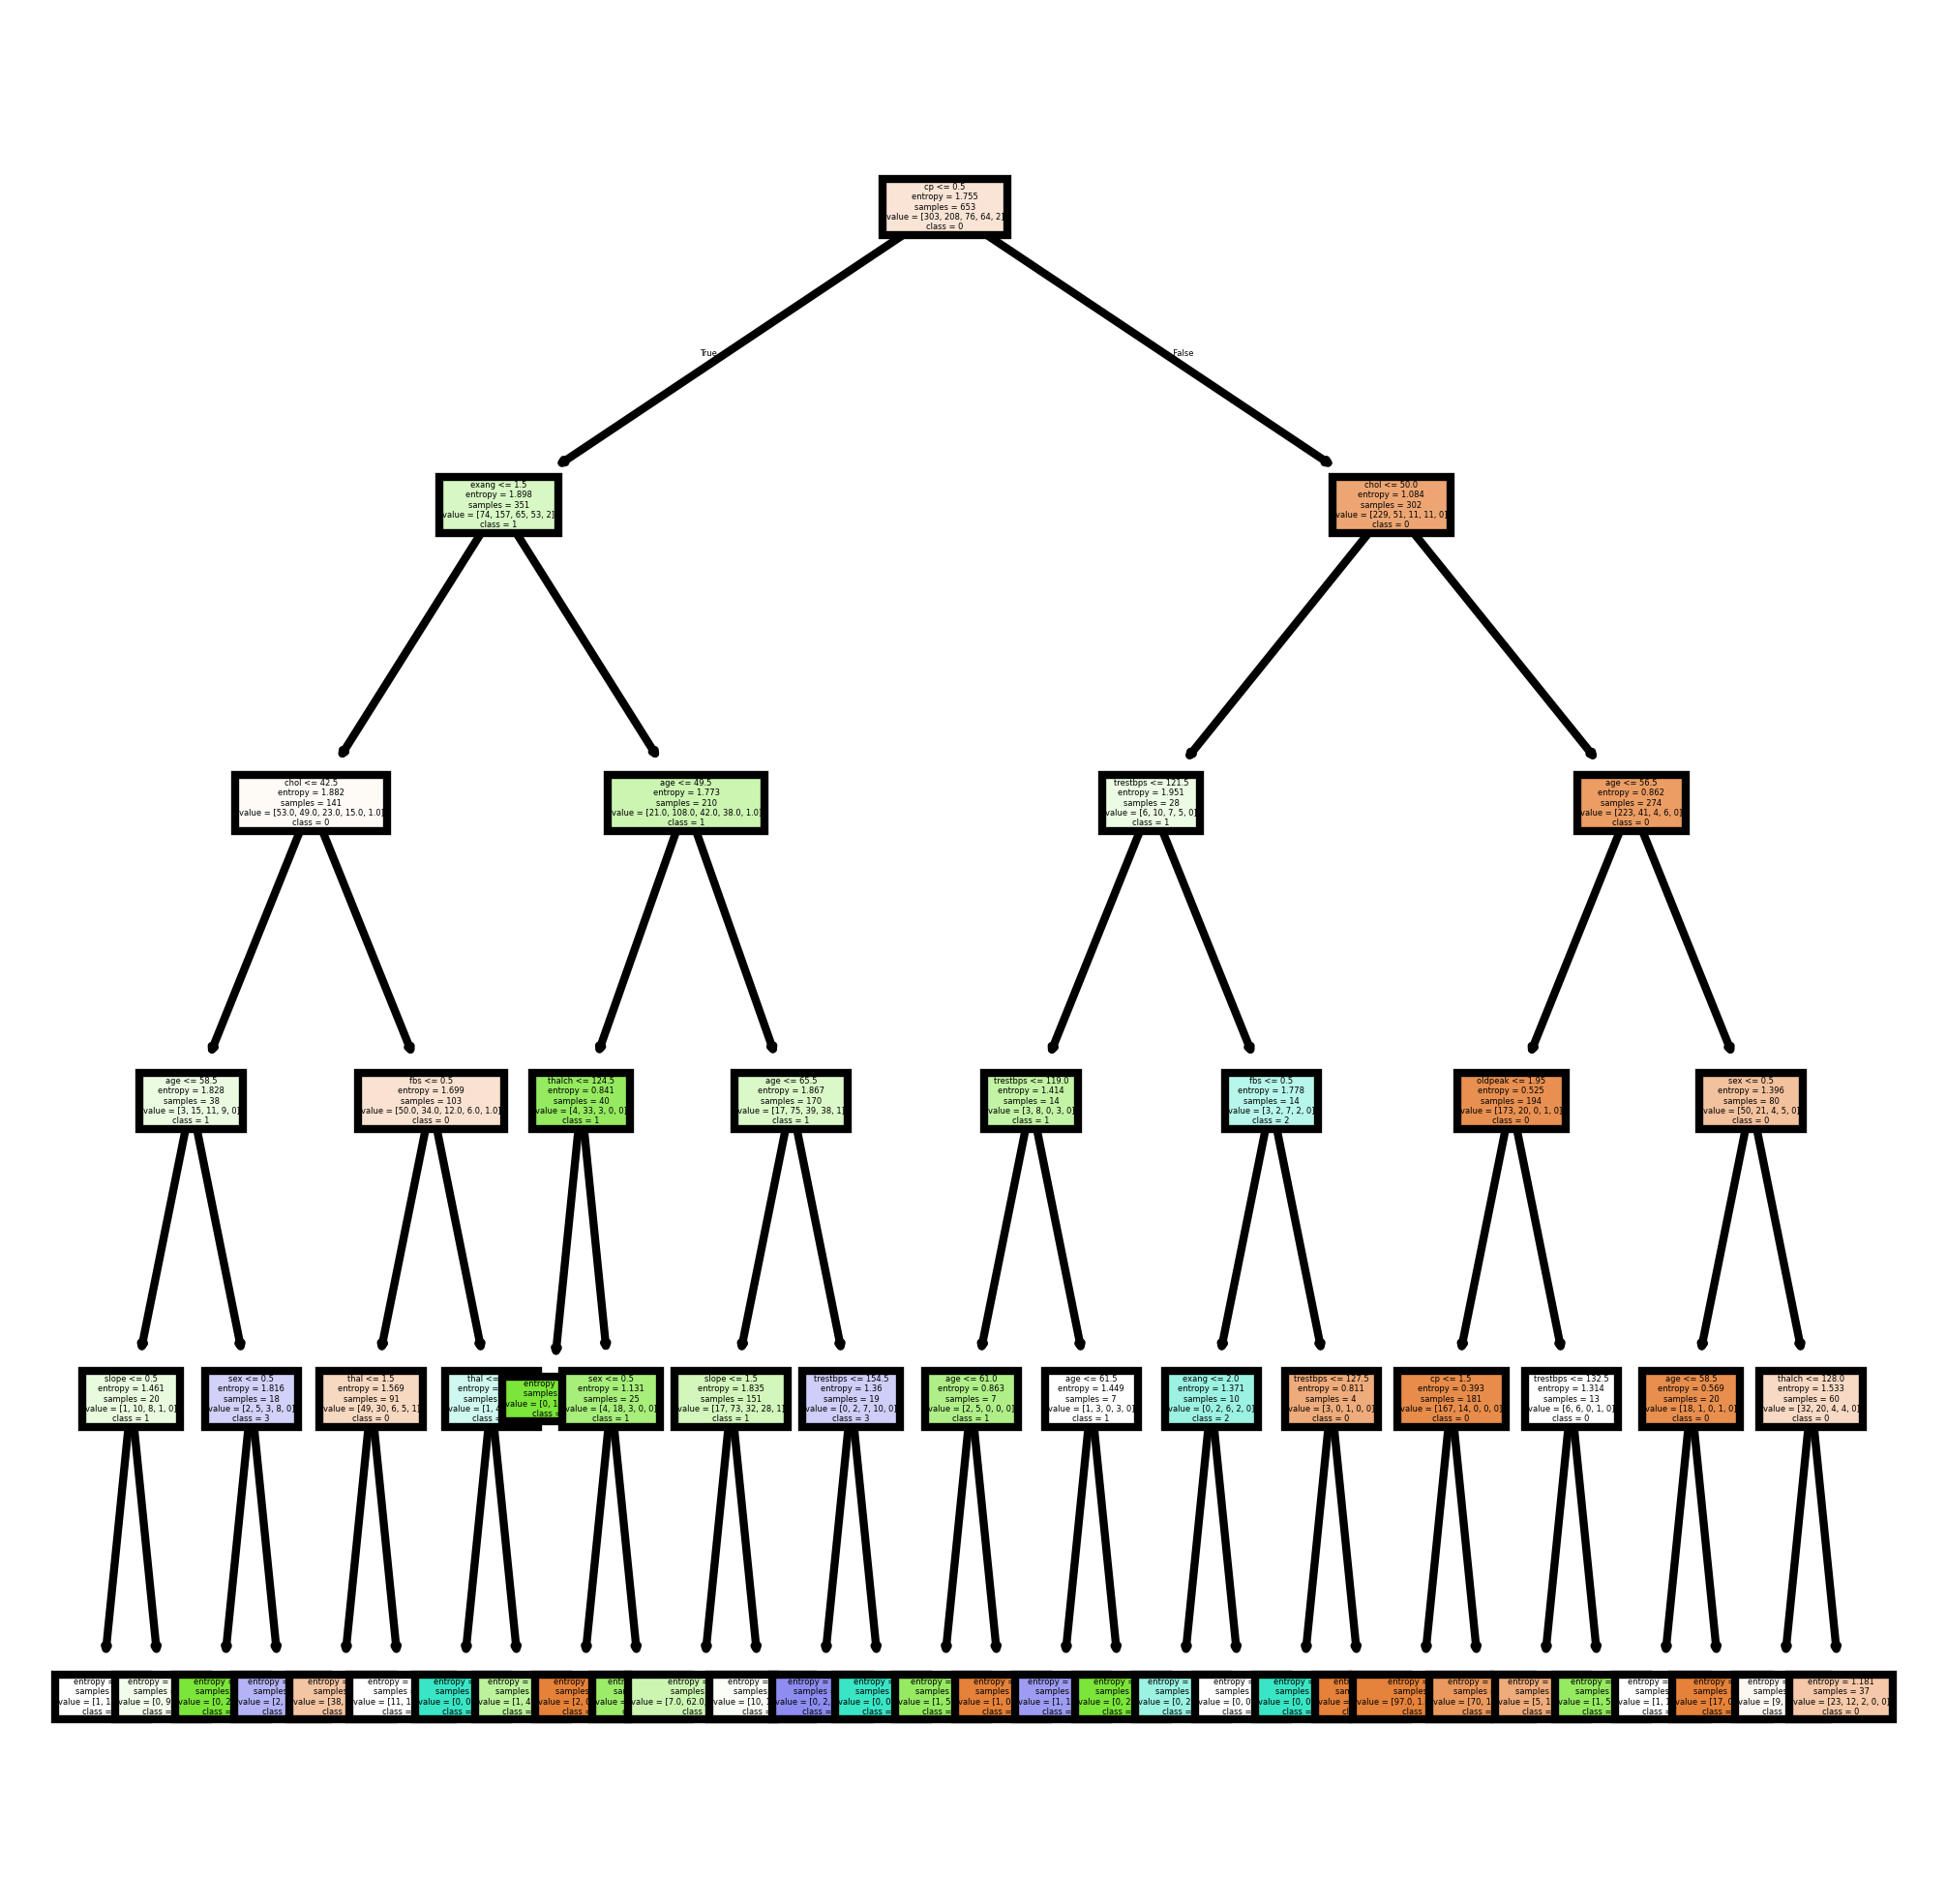

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=600)
tree.plot_tree(ent_model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [23]:
pd.Series(ent_model.feature_importances_,index=fn).sort_values(ascending=False)

cp          0.353756
age         0.168750
chol        0.124469
exang       0.070450
trestbps    0.063014
fbs         0.044734
thal        0.044286
sex         0.040264
slope       0.034639
oldpeak     0.029365
thalch      0.026274
restecg     0.000000
dtype: float64

In [24]:
e_preds=ent_model.predict(x_test)
pd.Series(e_preds).value_counts()

0    94
1    58
2     6
3     6
Name: count, dtype: int64

In [26]:
pd.crosstab(y_test,e_preds)

col_0,0,1,2,3
num,,,,
0,63,13,0,0
1,17,24,1,5
2,8,11,4,1
3,6,10,1,0


In [25]:
print('Training Accuracy',ent_model.score(x_train,y_train))
print('Testing Accuracy',ent_model.score(x_test,y_test))

Training Accuracy 0.6860643185298622
Testing Accuracy 0.5548780487804879


# Interview questions

1. max_depth,min_samples,max_feature are some of the common hyperparameters for decision tree models. A good hyperparameter can make the model more genralize and gives better accuracy.

2. In one-hot encoding sub columns are generated for every category contains 0 and 1 as in label encoding it gives unique labels for each category inthe same column.